In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

In [18]:
M= pd.read_csv("train.csv")

df = pd.DataFrame(M)

df = df[np.isfinite(df['Age'])]
df = df[np.isfinite(df['Fare'])]
columns_for_differencing = ['PassengerId','Name','Ticket','Cabin','Embarked']
X_train= df.copy()[df.columns.difference(columns_for_differencing)]

X_train=X_train.apply(lambda sex: pd.factorize(sex, sort=False)[0])
X_traind=X_train[X_train.Survived == 0]
X_trains=X_train[X_train.Survived == 1]
X_traind=X_traind.values

X_trains=X_trains.values
X_train=X_train.values


In [29]:
def hist(n):
    a,b,c=plt.hist(X_train[:,n],color='green') #indicates that lower class passengers were more
    x,y,z=plt.hist(X_trains[:,n])
    counts, bins, bars=a,b,c
    print(a,b,c)
    print(x,y,z)

    

In [ ]:
def probability(n):
    hist(n)
    probab=(1/4)*

[200. 100.  96.  67.  59.  52.  37.  41.  34.  28.] [  0.   21.9  43.8  65.7  87.6 109.5 131.4 153.3 175.2 197.1 219. ] <a list of 10 Patch objects>
[73. 29. 23. 19. 26. 29. 31. 21. 23. 16.] [  0.   21.5  43.   64.5  86.  107.5 129.  150.5 172.  193.5 215. ] <a list of 10 Patch objects>


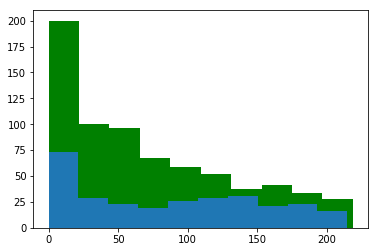

In [30]:
hist(1)


[521. 110.   0.  68.   0.   5.   5.   0.   4.   1.] [0.  0.6 1.2 1.8 2.4 3.  3.6 4.2 4.8 5.4 6. ] <a list of 10 Patch objects>
[186.   0.  61.   0.   0.  39.   0.   1.   0.   3.] [0.  0.4 0.8 1.2 1.6 2.  2.4 2.8 3.2 3.6 4. ] <a list of 10 Patch objects>


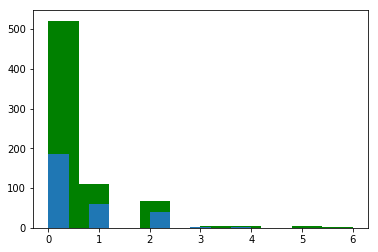

In [31]:
hist(2)


[355.   0.   0.   0.   0. 186.   0.   0.   0. 173.] [0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2. ] <a list of 10 Patch objects>
[ 85.   0.   0.   0.   0. 122.   0.   0.   0.  83.] [0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2. ] <a list of 10 Patch objects>


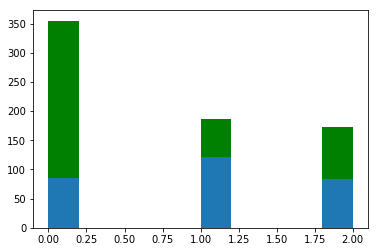

In [32]:
hist(3)


[453.   0.   0.   0.   0.   0.   0.   0.   0. 261.] [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ] <a list of 10 Patch objects>
[ 93.   0.   0.   0.   0.   0.   0.   0.   0. 197.] [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ] <a list of 10 Patch objects>


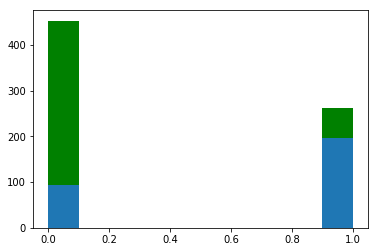

In [34]:
hist(4)


In [ ]:
n=6
X_traind1=X_traind[:,0:n]
X_trains1=X_trains[:,0:n]


# print(len(X_traind1))
c = np.array([[0.00] * n] *714)
v = np.array([[0.0000]*n]*3)



for i in range(0,290):
    for j in range(n):
        c[i][j]=X_trains1[i][j]

for i in range(290,714):
    for j in range(n):
        c[i][j]=X_traind1[i-290][j]

print(c)   
c=c.transpose()
Mcov=np.cov(c)
#print("\ncovariance of given matrix: \n",Mcov,"\n")
E,V=np.linalg.eig(Mcov)#E=eigen value,V=eigen vector
#print("eigen values are: \n",E,"\n")
#print("eigen vectors are: \n",V,"\n")
V=V.transpose()
for i in range(3):
    for j in range(n):
        v[i][j]=V[i][j]
#print("one vector chosen for PCA:\n",v,"\n")
M2=np.matmul(v,c)
M2=M2.transpose()
print(M2)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(M2[0:290,0],M2[0:290,1],M2[0:290,2])
ax.scatter(M2[290:714,0],M2[290:714,1],M2[290:714,2])
plt.show()